Everything in this notebook is my work for the first exercise of the AML course.

# Question 1: Pandas and Numpy

## Task a

Write a program that reads the provided text file and counts the occurrences of unique words. The
program should include all words in the count.


In [76]:
"""My solution splits the text on the non-alphabetic chars, removes them and counts the remanining."""
"""Link: https://docs.python.org/3/library/re.html"""

import numpy as np
import re

# the file.txt used for task a and b is: https://raw.githubusercontent.com/aalanwar/Logical-Zonotope/refs/heads/main/README.md
PATH = 'file.txt'

def wordcounter(path):
    with open(path, 'r', encoding='utf-8') as f:
        txt = f.read()
   
    # Make the text lowercase
    txt = txt.lower()
    
    # Split the text into words based on non-alphabetic characters
    words = np.array(re.split(r'[^a-zA-Z]+', txt))
    
    # Filter out empty strings resulting from the split
    filtered_words = np.array([word for word in words if word])
    
    # Get unique words and their count
    unique_words, counts = np.unique(filtered_words, return_counts=True)
    
    for word, count in zip(unique_words, counts):
        print(f"{word}: {count}")

wordcounter(PATH)

a: 15
able: 4
abstract: 1
add: 1
additional: 2
alanwar: 5
all: 3
amin: 2
amr: 4
an: 2
analysis: 6
and: 19
apis: 1
approximations: 1
are: 5
article: 1
arxiv: 2
author: 2
authors: 2
be: 1
benefits: 1
between: 6
binary: 2
booktitle: 1
boolean: 4
boolfunctionexample: 1
br: 44
by: 1
called: 1
can: 1
cars: 1
case: 1
cases: 1
cdc: 3
code: 1
com: 3
comes: 1
compared: 1
complexity: 2
computational: 3
computationally: 2
computations: 1
conference: 1
constructed: 1
construction: 2
containpoints: 1
control: 2
cotains: 1
crossing: 1
decision: 1
dependent: 1
determines: 1
dimensional: 2
doing: 2
due: 1
efficient: 1
enclosepoints: 1
encloses: 1
engineering: 1
exact: 3
exactly: 3
example: 1
exhaustive: 1
exponent: 1
extensibility: 1
feedback: 1
finding: 1
findlfsrkeyexample: 1
flag: 1
folder: 1
for: 13
formal: 2
formulate: 1
frank: 4
function: 2
functions: 4
fundamental: 2
gamma: 2
generalization: 2
generator: 2
generators: 3
h: 2
hbc: 2
henrik: 2
high: 2
highlight: 1
https: 4
ieee: 1
if: 1
illustrate

## Task b

Modify the program to exclude common words such as ’the’, ’a’, ’an’, and ’be’ from the count. Finally,
generate a histogram displaying the top 10 most frequent words.

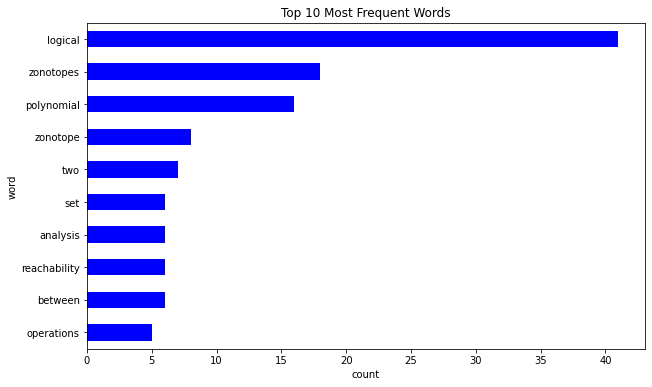

In [77]:
"""Further, I don't count the single letter words and the words that contain a symbols other than letters."""
"""Links: https://pandas.pydata.org/docs/user_guide/10min.html"""
"""https://www.w3schools.com/python/pandas/pandas_intro.asp"""
"""https://matplotlib.org/stable/gallery/index.html"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = 'file.txt'
# Add more words, if you need
EXCLUDED_WORDS = {'the', 'a', 'an', 'be', 'br', 'of', 'for', 'to', 'we', 'and', 'in', 'or', 'are', 'is'}

def count_words(path, excluded_words):
    
    with open(path, 'r', encoding='utf-8') as f:
        txt = f.read()
   
    # Make the text lowercase
    txt = txt.lower()
    
    # Split the text into words based on non-alphabetic characters
    words = np.array(re.split(r'[^a-zA-Z]+', txt))
    
    # Filter out excluded words
    filtered_words = np.array([word for word in words if word not in excluded_words and len(word) > 1])
    
    # Get unique words and their counts
    unique_words, counts = np.unique(filtered_words, return_counts=True)
    
    # Create a DataFrame with words and counts
    word_counts_df = pd.DataFrame({'word': unique_words, 'count': counts})
    
    # Sort the DataFrame by count in descending order
    word_counts_df = word_counts_df.sort_values(by='count', ascending=False).reset_index(drop=True)
    
    return word_counts_df

def plot_top_words(word_counts_df, top_n=10):
    # If we have less than 10 different words, use smaller number
    top_n = min(len(word_counts_df), top_n)   
   
    top_words_df = word_counts_df.head(top_n)
    
    # Plot the histogram
    top_words_df.plot(kind='barh', x='word', y='count', color='blue', legend=False, figsize=(10, 6))
    plt.xlabel('count')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word at the top
    plt.show()

word_counts_df = count_words(PATH, EXCLUDED_WORDS)
plot_top_words(word_counts_df)

## Task c

Create a matrix A with dimensions 100 × 20 (n = 100, m = 20).


In [78]:
A = np.zeros((100,20))
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Initialize matrix A with random values.

In [79]:
A = np.random.rand(100,20)
A

array([[7.70414427e-01, 4.67141926e-01, 6.15352868e-01, ...,
        8.59181200e-01, 8.11582172e-01, 8.30851765e-04],
       [3.85569229e-01, 7.81537285e-01, 4.57832456e-01, ...,
        4.80179158e-01, 2.49529783e-01, 1.31626324e-01],
       [4.38832691e-01, 1.64274092e-01, 6.92481096e-03, ...,
        3.86409897e-01, 9.95108364e-01, 4.97285793e-01],
       ...,
       [8.03102931e-01, 8.14235932e-01, 9.00205602e-01, ...,
        7.62914763e-02, 7.91526570e-01, 1.69236479e-02],
       [4.32333859e-01, 8.81607571e-01, 4.04031799e-01, ...,
        3.45727500e-01, 2.01916145e-01, 2.27529925e-01],
       [2.13951101e-01, 9.32733675e-01, 9.96778982e-01, ...,
        5.16423083e-01, 7.76630064e-02, 7.87835955e-01]])

Create a vector v of size 20 × 1 and initialize it with values from a normal distribution, where the mean $\mu$ is 2 and the standard deviation $\sigma$ is 0.01.

In [80]:
mean = 2
std_dev = 0.01
v = np.random.normal(mean, std_dev, (20, 1))
v

array([[2.0051764 ],
       [2.00617032],
       [1.99563677],
       [2.0111699 ],
       [1.98487687],
       [2.00639356],
       [1.99454316],
       [1.99316348],
       [1.99796149],
       [2.00249119],
       [2.00387057],
       [2.01564143],
       [1.99646151],
       [1.998721  ],
       [2.01760327],
       [1.99727572],
       [2.00325276],
       [1.9962538 ],
       [2.00189645],
       [1.99121996]])

Iteratively multiply each row of matrix A element-wise by vector v, and accumulate the results
into a new vector c.

In [81]:
"Links: https://numpy.org/doc/2.0/reference/generated/numpy.ndarray.flatten.html"
c = np.zeros(100)

for i in range(A.shape[0]):
    c[i] = np.sum(A[i, :] * v.flatten())
    
c

array([21.47593727, 18.31718802, 19.05170205, 20.33585218, 18.41289436,
       20.84055027, 21.90147309, 19.00541115, 19.90214722, 18.41719188,
       22.61392928, 18.20839597, 21.36850101, 19.09975697, 26.47438196,
       20.06186169, 18.10125826, 23.17016184, 20.01491769, 17.60634892,
       21.87975181, 21.22327491, 19.91173507, 20.49176738, 18.37990874,
       20.49730505, 26.03398131, 23.11473975, 27.49525704, 21.77108425,
       20.32689175, 24.18694296, 25.09684444, 20.11700348, 20.79546365,
       19.55207427, 18.34566891, 17.85055122, 20.74026857, 19.23139661,
       18.34005045, 21.45950315, 19.07846993, 21.93874214, 17.97933871,
       21.71455023, 19.12173055, 17.56757211, 20.44031447, 20.06301157,
       18.36560581, 17.63370393, 20.56012343, 19.17343673, 21.02100863,
       21.77813981, 20.95390643, 20.51560842, 22.2157773 , 20.36273872,
       22.01920558, 23.28394592, 16.34928222, 20.86840317, 22.84529727,
       18.37460355, 14.06146209, 22.46642694, 21.07995535, 22.18

Calculate the mean and standard deviation of vector c

In [82]:
mean_c = np.mean(c)
std_dev_c = np.std(c)

print("Mean of vector c:", mean_c)
print("Standard deviation of vector c:", std_dev_c)

Mean of vector c: 20.245156953688927
Standard deviation of vector c: 2.3710564564368415


Plot a histogram of vector c using 5 bins.

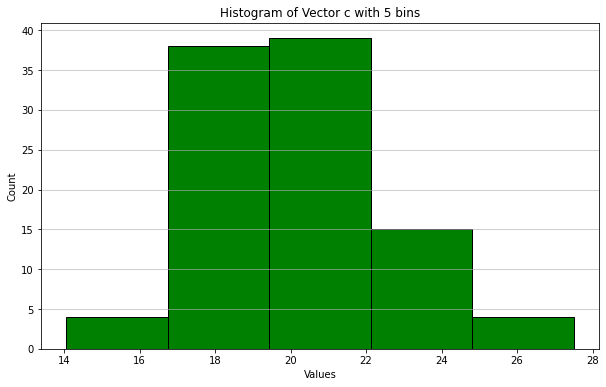

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(c, bins=5, color='green', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Histogram of Vector c with 5 bins')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Question 2: Linear Regression

Implement "Learn Simple Linear Regression" and "Predict using Simple Linear Regression". Plot the results.

In [84]:
import numpy as np

# For result reproductivity
np.random.seed(1337)

# Implementation of "Learn Simple Linear Regression"
def learn_simple_linreg(x, y, beta0_eq_0=False, beta1_eq_0=False):
    x = np.array(x)
    y = np.array(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    if beta0_eq_0:
        beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
        beta_0 = 0 
    elif beta1_eq_0:
        beta_1 = 0
        beta_0 = y_mean  
    elif not beta0_eq_0 and not beta1_eq_0:
        beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
        beta_0 = y_mean - beta_1 * x_mean
    else:
        beta_0 = 0
        beta_1 = 0
    return beta_0, beta_1

# Implementation of  "Predict Simple Linear Regression"
def predict_simple_linreg(x, beta_0, beta_1):    
    y_pred = beta_0 + beta_1 * x

    return y_pred

# Calculate MSE (Mean Squared Error) 
def calculate_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# Compare the results with the actual value, make a scatter plot and a line
def plot_results(X, y, y_pred, title, print_data=False):
    # Print the actual vs. predicted values 
    if print_data:
        for i, (actual, predicted) in enumerate(zip(y, y_pred)):
            print(f"Training example {i+1}: Actual: {actual:.4f}, Predicted: {predicted:.4f}")

    # Plot the data
    plt.figure(figsize=(10, 6))

    # Scatter plot for the actual data points
    plt.scatter(X, y, color='blue', label='Training Points')

    # Line plot for the predicted values
    # We sort x_train and corresponding y_pred for a smooth line
    sorted_indices = np.argsort(X)
    plt.plot(X[sorted_indices], y_pred[sorted_indices], color='red', label='Linear Fit')
    
    plt.xlabel('Feature (x)')
    plt.ylabel('Target (y)')
    plt.title(title)
    plt.legend()
    plt.show()


Generate three datasets (matrices) A with dimensions 100×2. Initialize them with normal distribution $\mu$ = 2 and $\sigma$ = [0.01, 0.1, 1]. Use "Learn Simple Linear Regression" and "Predict using Simple Linear Regression" on the matrix A. Plot the results. Set $\beta_0$= 0 and $\beta_1$ = 0 and comment the results.

In [85]:
# Dataset 1
mean = 2
std_dev = 0.01
A = np.random.normal(mean, std_dev, (100, 2))
A

array([[1.99296813, 1.99509718],
       [1.99678186, 1.98244921],
       [2.00206664, 1.97988735],
       [1.99442749, 2.00337217],
       [2.01548836, 1.98629263],
       [2.01425291, 1.99720536],
       [1.99440372, 2.01186383],
       [2.01698519, 1.9830878 ],
       [1.99300477, 2.00582963],
       [2.00978223, 1.98782628],
       [1.98670605, 1.99998545],
       [1.98685347, 1.99620388],
       [2.01265211, 2.00120668],
       [2.00147942, 1.97246274],
       [1.99643104, 2.00007718],
       [2.01478277, 1.99042385],
       [2.01329008, 1.9901415 ],
       [2.00471557, 1.99991253],
       [2.00367019, 2.01118555],
       [1.9999161 , 2.00466315],
       [2.01263269, 1.99098345],
       [1.98971157, 2.00569678],
       [2.00641665, 2.00259812],
       [2.01193178, 1.989537  ],
       [2.00139889, 1.98269344],
       [1.99869377, 1.9868974 ],
       [1.97828688, 1.98933819],
       [1.99966838, 2.01466396],
       [2.00876643, 2.0066999 ],
       [2.0069745 , 1.99747215],
       [2.

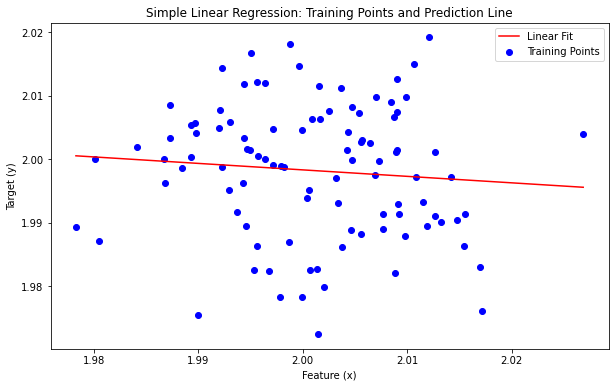

MSE of dataset 1: 0.00010849770709316469


In [86]:
# Split the data: The first column is for features, the second column is for labels

X = A[:, 0]
y = A[:, 1]

# Train the model using the matrix A
beta_0, beta_1 = learn_simple_linreg(X, y)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression: Training Points and Prediction Line')

# Add precision metric to show things about the variance
mse = calculate_mse(y, y_pred)
print("MSE of dataset 1:", mse)


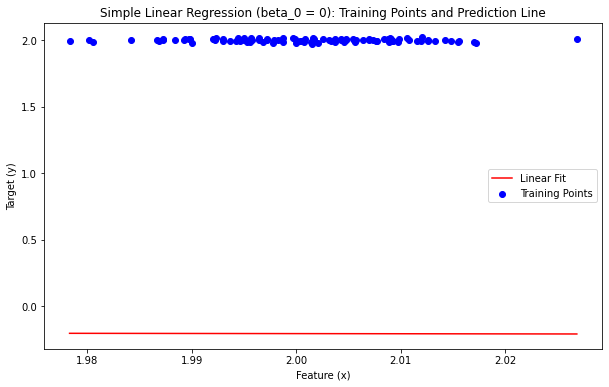

MSE of dataset 1 (beta_0 = 0): 4.85025608478885


In [87]:
# Set beta_0 = 0
beta_0, beta_1 = learn_simple_linreg(X, y, beta0_eq_0=True)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression (beta_0 = 0): Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 1 (beta_0 = 0):", mse)


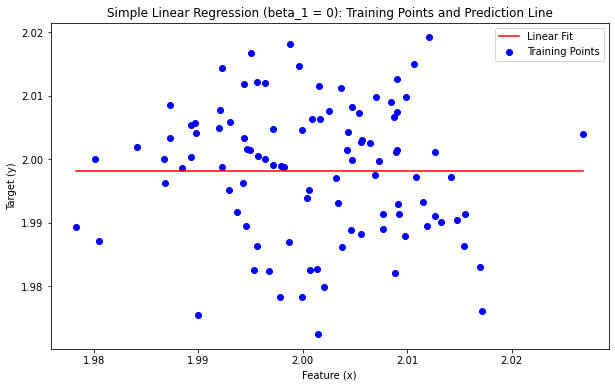

MSE of dataset 1 (beta_1 = 0): 0.00010936537736836184


In [88]:
# Set beta_1 = 0

beta_0, beta_1 = learn_simple_linreg(X, y, beta1_eq_0=True)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression (beta_1 = 0): Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 1 (beta_1 = 0):", mse)

In [89]:
# Dataset 2
mean = 2
std_dev = 0.1
A = np.random.normal(mean, std_dev, (100, 2))
A

array([[1.93233134, 2.04075919],
       [2.05936198, 2.07836184],
       [2.06730021, 2.04787814],
       [2.08390401, 2.08691237],
       [2.13463277, 2.13673477],
       [2.03668274, 2.03600416],
       [2.0666945 , 1.88546352],
       [2.04388915, 1.95621553],
       [1.95343102, 2.00312033],
       [1.91804777, 2.07588539],
       [2.05180565, 2.04281969],
       [2.0208135 , 2.12482649],
       [2.10425856, 2.07349767],
       [1.94067612, 2.15240642],
       [2.12164603, 2.10583692],
       [1.94831091, 2.10808539],
       [1.86171596, 2.01064564],
       [2.02742579, 1.83625172],
       [2.0994121 , 1.8639293 ],
       [1.96538714, 2.15606943],
       [2.06364084, 1.97863444],
       [1.94699713, 1.88526045],
       [1.86689797, 2.08671129],
       [2.01017772, 1.94345782],
       [2.05448665, 1.94117832],
       [1.84697103, 1.89448992],
       [2.12310259, 2.14926841],
       [2.10957269, 1.91672457],
       [2.14211968, 1.94807416],
       [1.93314113, 2.20658747],
       [2.

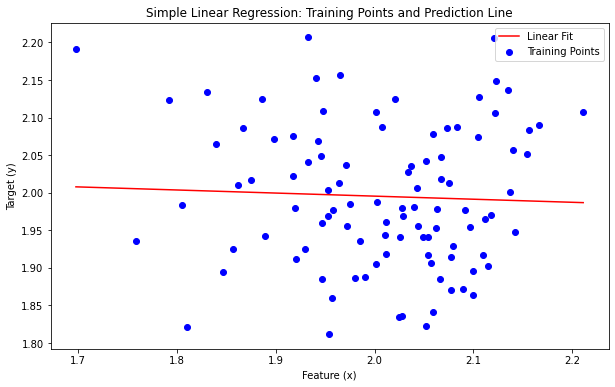

MSE of dataset 2: 0.008767117922909757


In [90]:
# Split the data: The first column is for features, the second column is for labels
X = A[:, 0]
y = A[:, 1]

# Train the model using the matrix A
beta_0, beta_1 = learn_simple_linreg(X, y)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression: Training Points and Prediction Line')

# Add precision metric to show things about the variance
mse = calculate_mse(y, y_pred)
print("MSE of dataset 2:", mse)

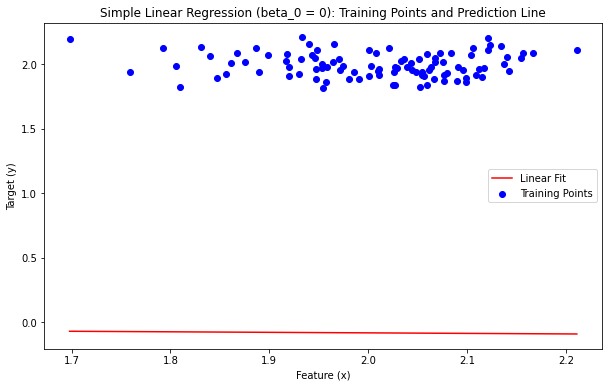

MSE of dataset 2 (beta_0 = 0): 4.324272739476659


In [91]:
# Set beta_0 = 0
beta_0, beta_1 = learn_simple_linreg(X, y, beta0_eq_0=True)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression (beta_0 = 0): Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 2 (beta_0 = 0):", mse)

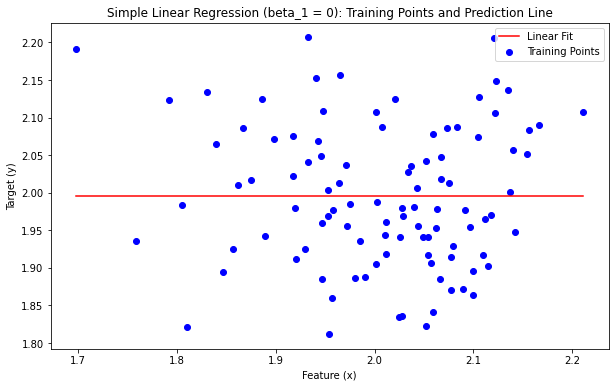

MSE of dataset 2 (beta_1 = 0): 0.008783519365407754


In [92]:
# Set beta_1 = 0

beta_0, beta_1 = learn_simple_linreg(X, y, beta1_eq_0=True)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression (beta_1 = 0): Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 2 (beta_1 = 0):", mse)

In [93]:
# Dataset 3
mean = 2
std_dev = 1
A = np.random.normal(mean, std_dev, (100, 2))
A

array([[1.62476901, 2.80430086],
       [0.62830104, 0.29816596],
       [0.38122735, 2.03843535],
       [0.29521187, 1.81293064],
       [2.89581491, 1.74848291],
       [1.08723926, 1.5986349 ],
       [1.05161192, 3.00727699],
       [0.74189673, 2.22315161],
       [0.01592974, 0.53706204],
       [2.49553402, 3.87812878],
       [2.14930356, 2.68151947],
       [2.38147744, 3.90927481],
       [1.49130903, 2.08598906],
       [2.64704057, 0.56166857],
       [1.91685025, 1.23381504],
       [2.35343087, 2.55799723],
       [0.56236279, 2.88695012],
       [1.05737011, 1.61931519],
       [2.83234652, 0.83449726],
       [1.38589541, 1.17369598],
       [1.28527836, 1.90491146],
       [1.33633696, 3.01174153],
       [1.50035173, 3.24871356],
       [2.29206126, 4.03827667],
       [2.84499919, 1.96265721],
       [2.63238245, 3.04834099],
       [2.40440591, 2.01453118],
       [1.87866031, 1.46926062],
       [1.45439445, 4.7210461 ],
       [0.30937042, 0.04846942],
       [2.

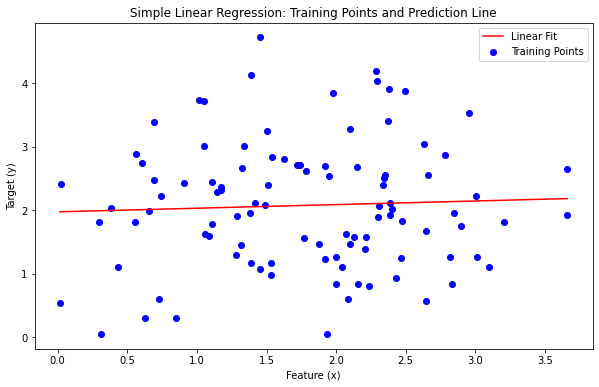

MSE of dataset 3: 0.9840378255932797


In [94]:
# Split the data: The first column is for features, the second column is for labels
X = A[:, 0]
y = A[:, 1]

# Train the model using the matrix A
beta_0, beta_1 = learn_simple_linreg(X, y)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression: Training Points and Prediction Line')

# Add precision metric to show things about the variance
mse = calculate_mse(y, y_pred)
print("MSE of dataset 3:", mse)

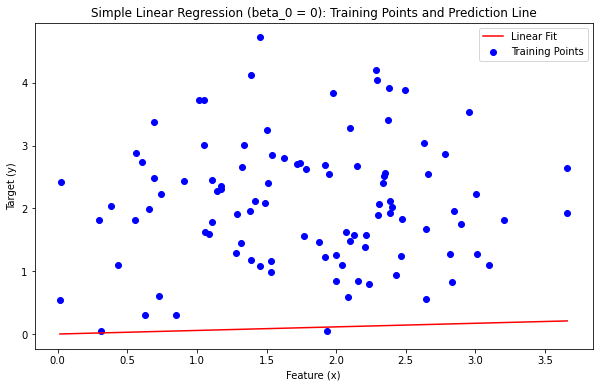

MSE of dataset 3 (beta_0 = 0): 4.87734302403764


In [95]:
# Set beta_0 = 0
beta_0, beta_1 = learn_simple_linreg(X, y, beta0_eq_0=True)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression (beta_0 = 0): Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 3 (beta_0 = 0):", mse)

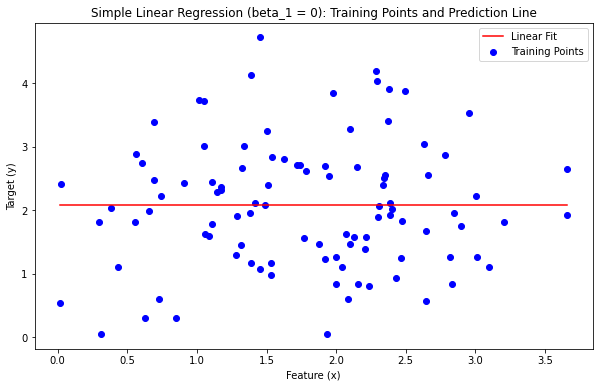

MSE of dataset 3 (beta_1 = 0): 0.9861773450971917


In [96]:
# Set beta_1 = 0

beta_0, beta_1 = learn_simple_linreg(X, y, beta1_eq_0=True)

# Predict
y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Simple Linear Regression (beta_1 = 0): Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 3 (beta_1 = 0):", mse)

Use np.linalg.lstsq to learn the parameters $\beta_0$ and $\beta_1$. Compare the results with "Learn Simple Linear Regression"

In [97]:
"""Link: https://numpy.org/doc/2.0/reference/generated/numpy.linalg.lstsq.html"""
def learn_linreg_lstsq(X, y):
    # Add a column of ones to X for the intercept term (beta_0)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Use np.linalg.lstsq to solve for beta_0 and beta_1
    betas, residuals, rank, singular_values = np.linalg.lstsq(X_b, y, rcond=None)

    return betas[0], betas[1] 

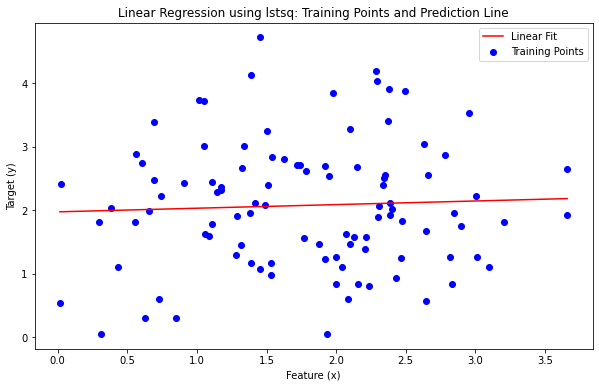

MSE of dataset 3 (lstsq): 0.9840378255932795


In [98]:
# Predict and plot
# Only for dataset 3, because the results and the conclusions for the other two are similar

beta_0, beta_1 = learn_linreg_lstsq(X, y)

y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Linear Regression using lstsq: Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 3 (lstsq):", mse)

Use sklearn.linear model.LinearRegression to learn the parameters beta_0 and beta_1. Compare the results with "Learn Simple Linear Regression"

In [99]:
"""Link: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html"""
from sklearn.linear_model import LinearRegression

def learn_linreg(X, y):
    X = X.reshape(-1, 1)  # Reshape for sklearn

    model = LinearRegression()

    model.fit(X, y)

    beta_0 = model.intercept_  
    beta_1 = model.coef_[0]   

    return beta_0, beta_1

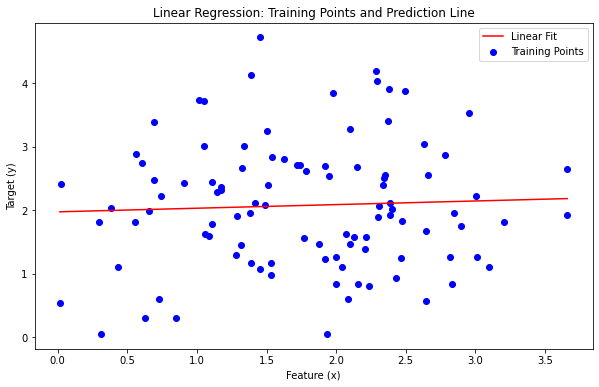

MSE of dataset 3 (LinReg): 0.9840378255932795


In [100]:
# Predict and plot 
# Only for dataset 3, because the result for the other two are similar
beta_0, beta_1 = learn_linreg(X, y)

y_pred = predict_simple_linreg(X, beta_0, beta_1)

plot_results(X, y, y_pred, 'Linear Regression: Training Points and Prediction Line')

mse = calculate_mse(y, y_pred)
print("MSE of dataset 3 (LinReg):", mse)

#### **Analysis of how the variance effects the results**

In general, variance ($\sigma^2$) affects the spread of the datapoints around the mean value. When the variance is low, the data points are tightly clustered around the mean. The points are close to the actual linear trend, and the linear regression line fits the data more accurately because the spread is minimal, leading to smaller residuals. When the variance is high, the data points are more spread out around the mean value, and there is more noise. The predictions become less accurate because the model tries to fit a line, but the residuals are larger.

The consequences of high and low variance can also be observed in our data. Visually, we can see that each plot has a different scale, and the scale increases with the variance. When the scale increases, the residuals also become larger. The implemented metric, MSE (Mean Squared Error), confirms our visual observations, as it increases with the variance. 


#### **Analysis of how $\beta_0$ = 0 and $\beta_1$ = 0 effects the results**

In our case, $\beta_0$ is the intercept, and $\beta_1$ is the slope. If we set $\beta_1$ $=$ 0 and keep only $\beta_0$, the linear fit becomes a constant line (a horizontal line) equal to $\bar{y}$. We use data with normal distribution and using the mean value gives us a good result, but if we use it with data with strongly increasing or strongly decreasing trend (which usually is the case), this won't give us a good solution, because it won't capture the correlation between feature and target (i.e. the $x_i$ is not considred at all for the predictions). 

When $\beta_0$ $=$ 0 (and $\beta_1$ $\neq$ 0), the slope allows the model to capture the dependencies between features and targets, as it takes into account each sample individually. However, we observe that the predicted line is far from the datapoints (see visualization). This is because the predictions aren't shifted by the constant value $\beta_0$, which is necessary to properly align the relationship between $x_i$ and $y_i$.

We observe that the variance plays the same role here as described above. For the three datasets, we set the value of $\beta_0$ = 0 and then assign different variance for each dataset. We see that the higher the variance, the greater the MSE. The same applies for $\beta_1$ = 0.

#### **Analysis of the relations between the models: Simple Linear Regression, Linear Regression and lstsq**

All in all, the three models are solving the exact same problem and are equivalent; that's why we obtain the same result for MSE (Mean Squared Error). The *numpy.linalg.lstsq* function solves the *Least Squares* problem ($min_{\beta} SSE$, where $SSE = \sum_{i=1}^{N} (y_i - f(\bold{x_i},\beta))^2 $), which is the same problem that *Linear Regression* addresses. The values we have for $\beta_0$ and $\beta_1$ in *Simple Linear Regression* are solutions to the *Least Squares* problem for one-dimensional setting (i.e one feature). Expressed mathematically below: 
$$min_{\beta} SSE = min_{\beta} \sum_{i=1}^{N} (y_i - (\beta_0 + \beta_1 x_i))^2$$





